#### Import relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data

##### Source: 
https://www.kaggle.com/gsutters/the-human-freedom-index/version/2#_=_

In [2]:
complete_data = pd.read_csv('../data/original/hfi_cc_2018.csv')

In [3]:
complete_data.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,pf_association_sport_establish,pf_association_sport_operate,pf_association_sport,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_expression,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_restrictions,ef_legal_police,ef_legal_crime,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,10.0,10.000000,10.000000,10.000000,10.0,7.5,5.0,5.0,5.0,7.500000,8.806810,5.0,10.0,5.0,6.666667,NaN,NaN,10.0,9.566667,8.011111,9.192593,10.0,10.0,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN,10.0,10.0,10.0,10.0,5.000000,5.25,10.0,10.0,10.0,8.607143,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.596281,57.0,8.232353,7.509902,8.0,9.0,7.0,8.0,7.935564,2.668222,3.145462,4.512228,8.333333,4.166667,4.387444,6.485287,6.933500,6.215401,0.948718,5.071814,8.986454,9.484575,9.74360,10.0,9.553657,9.626667,9.24,8.0240,8.963556,5.574481,9.405328,7.489905,10.00000,6.306106,4.615385,8.296923,6.406138,8.214900,5.0,7.295687,9.0,7.098562,5.566667,5.396399,6.234861,8.0,6.299741,10.0,6.916278,6.072172,6.000000,9.713864,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,5.0,9.926119,9.990149,8.842060,10.0,7.5,0.0,0.0,0.0,5.833333,8.043882,5.0,5.0,5.0,5.000000,NaN,NaN,5.0,6.873333,2.961111,4.944815,5.0,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,5.0,10.0,10.0,2.666667,4.00,10.0,7.5,7.5,7.380952,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,5.281772,147.0,2.150000,7.817129,0.0,7.0,2.0,4.5,3.616782,4.186704,4.327113,4.689952,4.166667,5.000000,4.507538,6.626692,6.136845,6.737383,0.820513,4.690743,6.955962,8.339152,8.72046,5.0,7.

### Basic categories and their full forms

- `pf_score, pf_rank` - **Personal Freedom (pf)**
    - `pf_rol` - Rule of Law (rol)
    - `pf_ss` - Security and Safety (ss)
    - `pf_movement` - Freedom of Movement
    - `pf_religion` - Religious Freedom
    - `pf_association` - Freedom to Associate and Assemble with peaceful individuals or organizations
    - `pf_expression` - Freedom of Expression
    - `pf_identity` - Identity and Relationships

- ef (`ef_score, ef_rank`) - **Economic Freedom (ef)**
    - `ef_government` - Size of Government
    - `ef_legal` - Legal System and Property Rights
    - `ef_money` - Sound Money
    - `ef_trade` - Freedom to Trade Internationally
    - `ef_regulation` - Regulation

- hf (`hf_score, hf_rank, hf_quartile`) - **Human Freedom (hf)**

### Viewing the data

In [4]:
shape = complete_data.shape
print('Dataset has ' + str(shape[0]) + ' rows')
print('Dataset has ' + str(shape[1]) + ' columns')

Dataset has 1458 rows
Dataset has 123 columns


##### Data types of the variables

In [5]:
complete_data.dtypes

year                                    int64
ISO_code                               object
countries                              object
region                                 object
pf_rol_procedural                     float64
pf_rol_civil                          float64
pf_rol_criminal                       float64
pf_rol                                float64
pf_ss_homicide                        float64
pf_ss_disappearances_disap            float64
pf_ss_disappearances_violent          float64
pf_ss_disappearances_organized        float64
pf_ss_disappearances_fatalities       float64
pf_ss_disappearances_injuries         float64
pf_ss_disappearances                  float64
pf_ss_women_fgm                       float64
pf_ss_women_missing                   float64
pf_ss_women_inheritance_widows        float64
pf_ss_women_inheritance_daughters     float64
pf_ss_women_inheritance               float64
pf_ss_women                           float64
pf_ss                             

##### Summary statistics

In [6]:
complete_data.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,pf_association_sport_establish,pf_association_sport_operate,pf_association_sport,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_expression,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_restrictions,ef_legal_police,ef_legal_crime,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,1378.000000,1378.000000,1286.000000,1338.000000,917.000000,917.000000,1339.000000,1358.000000,1378.000000,1360.000000,1360.000000,1317.000000,1378.000000,727.000000,727.000000,1129.000000,1364.000000,1364.000000,1368.000000,1129.000000,1129.000000,727.000000,727.000000,1129.000000,727.000000,727.000000,1129.000000,727.000000,727.000000,1129.000000,1129.000000,1378.000000,1378.000000,1378.000000,1378.000000,1123.000000,1123.000000,1129.000000,1378.000000,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000,1392.000000,1298.000000,1354.000000,1334.000000,1265.000000,1334.000000,1378.000000,1291.000000,1378.000000,1289.000000,1378.000000,1181.000000,1368.000000,1358.000000,1289.000000,1289.000000,1434.000000,1378.000000,1388.000000,1386.000000,1386.000000,1378.000000,1376.000000,1289.000000,1366.000000,1367.000000,1373.000000,1288.000000,1368.000000,1374.000000,1371.000000,1294.000000,1369.000000,1373.000000,1378.000000,1377.000000,1286.000000,1386.000000,1358.000000,1378.000000,1367.000000,1287.000000,1288.000000,1370.000000,1348.000000,1377.000000,1374.000000,1289.000000,1356.000000,1368.000000,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,

- As expected, variables lie between 0 and 10 except year, rank, quartile
- All variables except 'year' have some missing values 

##### Missing data matrix

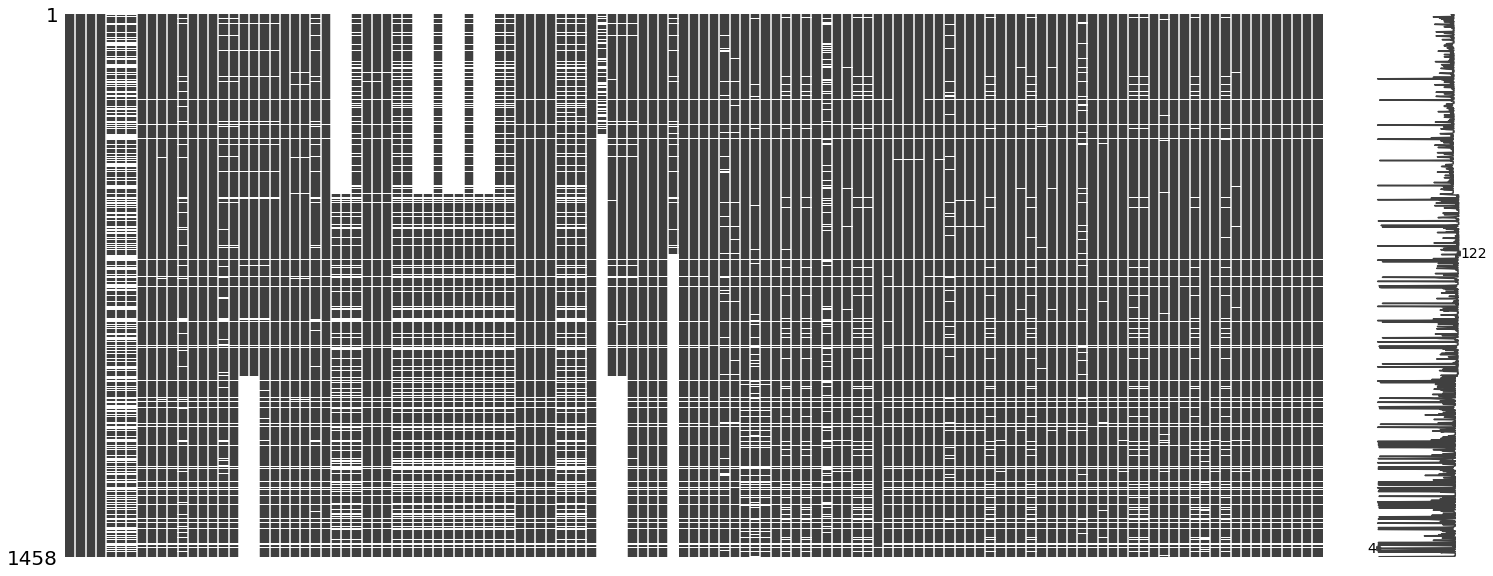

In [7]:
missingno.matrix(complete_data)

## Creating df focusing on Human Freedom

In [8]:
hf = complete_data.filter(
    ['year',
     'ISO_code',
     'countries',
     'region',
     'hf_score',
     'hf_rank',
     'hf_quartile']
    , axis=1)

##### Which rows have NaNs?

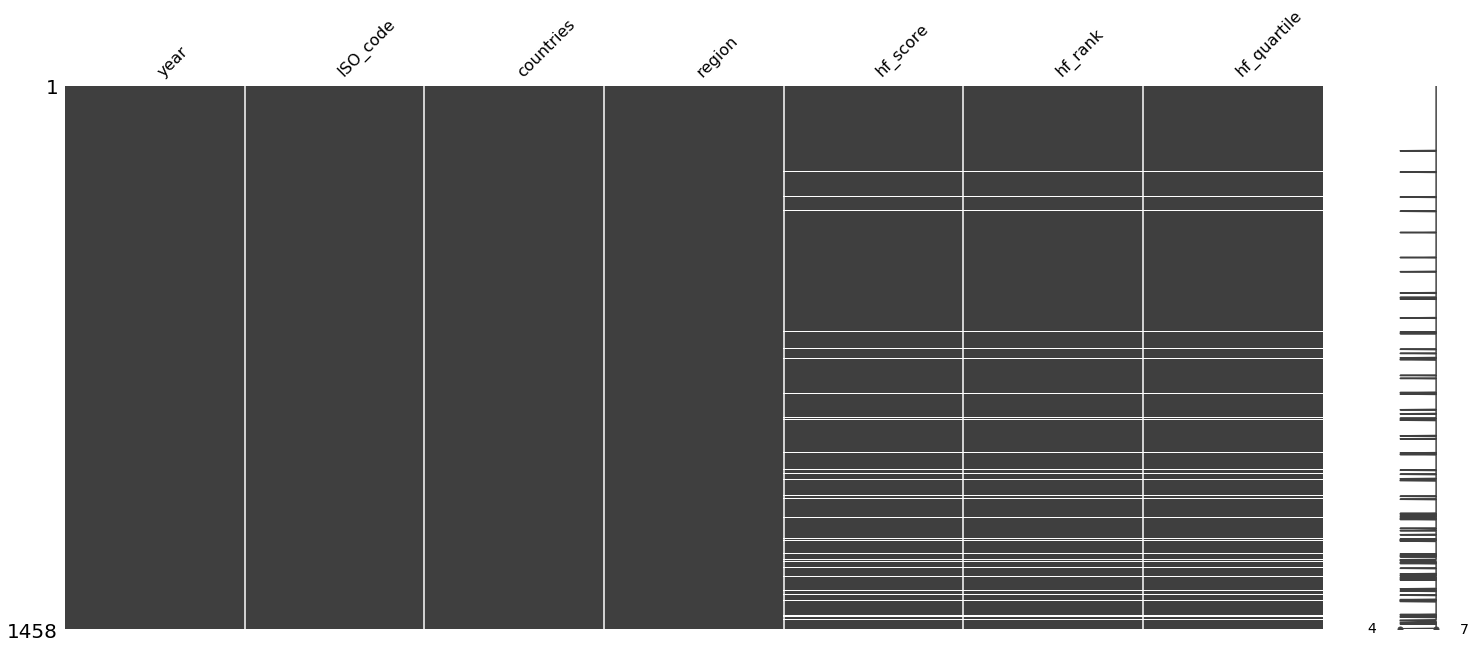

In [9]:
missingno.matrix(hf)

In [10]:
hf[hf.isnull().any(axis=1)].sort_values(by=['countries','year'])

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile
1308,2008,BLR,Belarus,Eastern Europe,NaN,NaN,NaN
1146,2009,BLR,Belarus,Eastern Europe,NaN,NaN,NaN
984,2010,BLR,Belarus,Eastern Europe,NaN,NaN,NaN
822,2011,BLR,Belarus,Eastern Europe,NaN,NaN,NaN
660,2012,BLR,Belarus,Eastern Europe,NaN,NaN,NaN
498,2013,BLR,Belarus,Eastern Europe,NaN,NaN,NaN
336,2014,BLR,Belarus,Eastern Europe,NaN,NaN,NaN
174,2015,BLR,Belarus,Eastern Europe,NaN,NaN,NaN
1312,2008,BTN,Bhutan,South Asia,NaN,NaN,NaN
1150,2009,BTN,Bhutan,South Asia,NaN,NaN,NaN


##### Remove rows with NaNs

In [11]:
hf = hf.dropna()

##### Save df

In [12]:
hf.to_csv('../data/human_freedom.csv', index=False)

In [13]:
hf.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.241402,57.0,2.0


## Creating df focusing on Personal and Economic freedom

In [14]:
first_layer = complete_data.filter(
    ['year',
     'ISO_code',
     'countries',
     'region',
     'pf_score',
     'ef_score']
    , axis=1)

##### Which rows have NaNs?

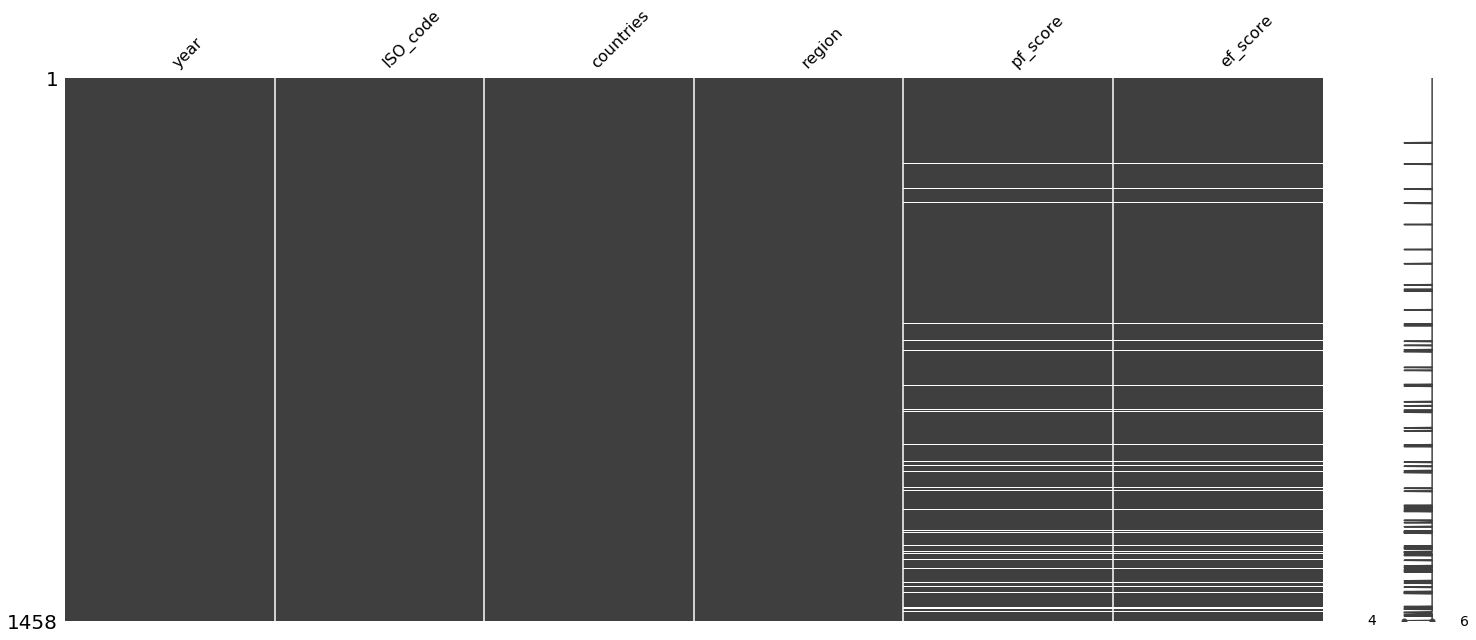

In [15]:
missingno.matrix(first_layer)

##### Remove rows with NaNs

In [16]:
first_layer = first_layer.dropna()

##### Save df

In [17]:
first_layer.to_csv('../data/personal_economic_freedom.csv', index=False)

In [18]:
first_layer.head()

,year,ISO_code,countries,region,pf_score,ef_score
0,2016,ALB,Albania,Eastern Europe,7.596281,7.54
1,2016,DZA,Algeria,Middle East & North Africa,5.281772,4.99
2,2016,AGO,Angola,Sub-Saharan Africa,6.111324,5.17
3,2016,ARG,Argentina,Latin America & the Caribbean,8.099696,4.84
4,2016,ARM,Armenia,Caucasus & Central Asia,6.912804,7.57
